# Model evaluation

## Import packages

In [21]:
from keras.models import load_model

import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Load the test data

In [5]:
# import the data
with open('X_test_even.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('Y_test_even.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)
    
with open('scores_test_even.pickle', 'rb') as handle:
    scores_test = pickle.load(handle)
    
# import dictionaries
with open('ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
    
# small change in format
nbr_reviews = len(X_test)
review_length = len(X_test[0])
tmp = np.concatenate(X_test).ravel()
X_test = np.reshape(tmp,(nbr_reviews,review_length))

vocabulary_size = 46210

print('Loaded dataset with {} test samples.'.format(nbr_reviews))
print('The length of each review is {}.'.format(review_length))

Loaded dataset with 49871 test samples.
The length of each review is 100.


## Choose the model to evaluate

In [14]:
model = load_model('second_RNN_GRU_CNN_XXX.h5')
print(model.summary())
preds_original = model.predict(X_test).T
#preds = np.round(model.predict(X_test)).T
#preds = preds[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 300)          13863300  
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 99, 100)           60100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 99, 100)           400       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 96, 100)           40100     
_________________________________________________________________
gru_5 (GRU)                  (None, 256)               274176    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total para

In [15]:
preds_scalar = preds_original[0]
preds = np.round(preds_original[0])

## Investigate review missclassifications

In [18]:
misclassifications = np.where(preds!=Y_test)
misclassifications = misclassifications[0]
print('Out of {} test reviews, {} were misclassified.'.format(nbr_reviews, len(misclassifications)))
print('A few examples of the misclassified reviews:')

def print_sentence(index):
    sentence_ix = misclassifications[index]
    tmp = []
    for val in X_test[sentence_ix]:
        if ix_to_word[str(val)] == 'ZERO':
            break
        tmp.append(ix_to_word[str(val)])
    processed_sentence = ' '.join(tmp)
    print(processed_sentence)
    
def print_misclassification(index):
    print('1. Predicted output: {} Actual label: {} Score: {}'.format(preds_scalar[misclassifications[index]], Y_test[misclassifications[index]], scores_test[misclassifications[index]]))
    print_sentence(index)
    print(' ')
  
print_misclassification(0)
print_misclassification(10)
print_misclassification(20)
print_misclassification(30)
print_misclassification(40)
print_misclassification(50)
print_misclassification(60)

Out of 49871 test reviews, 4530 were misclassified.
A few examples of the misclassified reviews:
1. Predicted output: 0.1792284995317459 Actual label: 1 Score: 4
i am ordering the coconut raw nectar again becasue of the health benifits and i like it in my coffee the last package was packaged very well but the last bottle has begun to crystalize which means its not as fresh i have purchased this product before in bulk in my community and never had a problem with it crystalizing i hope this next shipment will be fresh
 
1. Predicted output: 0.9388192296028137 Actual label: 0 Score: 3
recieved this product a day early witch was niece looks good and works great cost seems a little high
 
1. Predicted output: 0.4060961604118347 Actual label: 1 Score: 5
to get their fruit servings each package is equivalent to one fruit in diabetic lingo i recommend these for all diabetic people be careful when you make your purchase to verify you are getting what you want because there is a product called f

## Investigate missclassifications based on review length

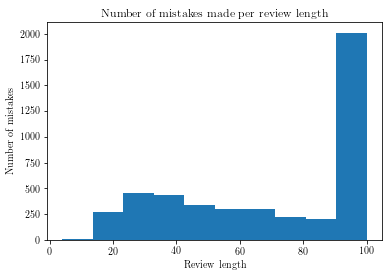

In [34]:
miss_len_vec = []
for index in misclassifications:
    review_len = 0
    for val in X_test[index]:
        if ix_to_word[str(val)] == 'ZERO':
            break
        else:
            review_len += 1
    miss_len_vec.append(review_len)

plt.hist(miss_len_vec)
plt.title('Number of mistakes made per review length')
plt.xlabel('Review length')
plt.ylabel('Number of mistakes')
plt.show()

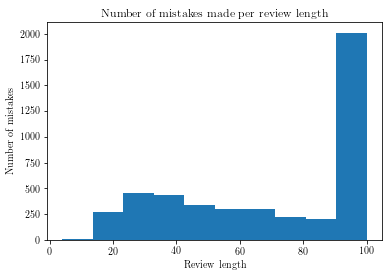

In [35]:
plt.hist(miss_len_vec)
plt.title('Number of mistakes made per review length')
plt.xlabel('Review length')
plt.ylabel('Number of mistakes')
plt.draw()
plt.savefig('missed_lengths.pgf')

## Score distribution

C:\Users\lovis\Anaconda3\envs\dmlGPU\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


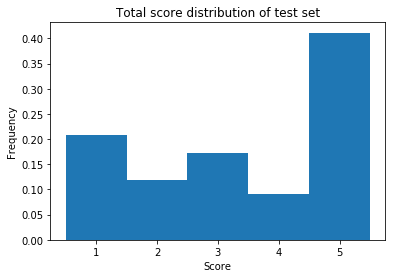

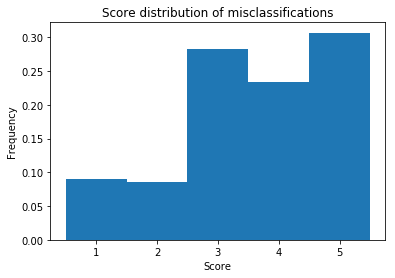

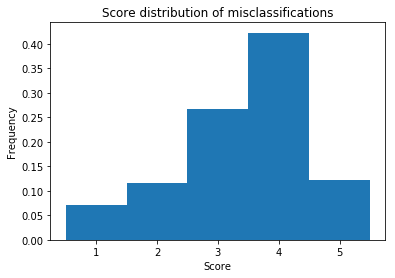

In [19]:
# Distribution of scores for whole test set
plt.hist(scores_test, bins=[1,2,3,4,5,6], normed=True)
plt.title('Total score distribution of test set')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Total number of data points: %d' %len(Y_even))

# Number of missclassifications per score type
plt.hist(scores_test[misclassifications], bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))

num_scores = [sum(scores_test == 1), sum(scores_test == 2), sum(scores_test == 3), sum(scores_test == 4), sum(scores_test == 5)]
num_scores_misclassifications = [sum(scores_test[misclassifications] == 1), sum(scores_test[misclassifications] == 2), sum(scores_test[misclassifications] == 3), sum(scores_test[misclassifications] == 4), sum(scores_test[misclassifications] == 5)]

scaled_scores_mis = [num_scores_misclassifications[i]/num_scores[i] for i in range(5)]
scaled_scores_mis = np.round([x*1000 for x in scaled_scores_mis])
scaled_scores_mis_data = [1] * int(scaled_scores_mis[0]) + [2] * int(scaled_scores_mis[1]) + [3] * int(scaled_scores_mis[2]) + [4] * int(scaled_scores_mis[3]) + [5] * int(scaled_scores_mis[4])

# Scaled with number of reviews per score
plt.hist(scaled_scores_mis_data, bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
#plt.Axes.set_xticks(ticks=[1.5,2.5,3.5,4.5,5.5])
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.show()
#print('Number of training data points: %d' %len(Y_train_even))

## Save figure with distribution

C:\Users\lovis\Anaconda3\envs\dmlGPU\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


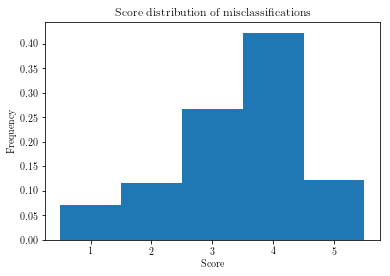

In [22]:
# Scaled with number of reviews per score
plt.hist(scaled_scores_mis_data, bins=[1,2,3,4,5,6], normed=True)
plt.title('Score distribution of misclassifications')
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.draw()
plt.savefig('missclass_by_score_distrib.pgf')